In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os
plt.style.use('ggplot')

In [2]:
save_root = '../final_data/analysis_plot2/'

In [3]:
def ntocell(name):
    if name.find('N')!=-1:
        cls = 'N'
    else:
        cls = 'Y'
    if name.find('frame')!=-1:
        fos = 'F'
        cwt = '-'
        ovl = '-'
    else:
        fos = 'S'
        if name.find('cwt')!=-1:
            cwt = 'Y'
        else:
            cwt = 'N'
        if name.find('F')!=-1:
            ovl = 'N'
        else:
            ovl = 'Y'
    if name.find('svm')!=-1:
        mod = 'SVM'
    elif name.find('rf')!=-1:
        mod = 'RF'
    elif name.find('dnn')!=-1:
        mod = 'DNN'
    else:
        mod = 'LSTM'
    return cls, fos, cwt, ovl, mod

In [4]:
df = pd.read_csv('../final_data/analysis2c.csv')
df2 = pd.DataFrame(columns=['model', 'tracc', 'trfa', 'trdr', 'teacc', 'tefa', 'tedr', 'tteacc', 'ttefa', 'ttedr'])
recs = ['tracc', 'trfa', 'trdr', 'teacc', 'tefa', 'tedr', 'tteacc', 'ttefa', 'ttedr']
for i in range(38):
    st = i*10
    new_row = [df.iloc[st]['model']]
    for rec in recs:
        m = np.mean(df.iloc[st:st+10][rec].to_numpy())
        new_row.append(np.round(m,2))
    df2.loc[i] = new_row
df3 = df2

### Show (cluster,cwt,window)

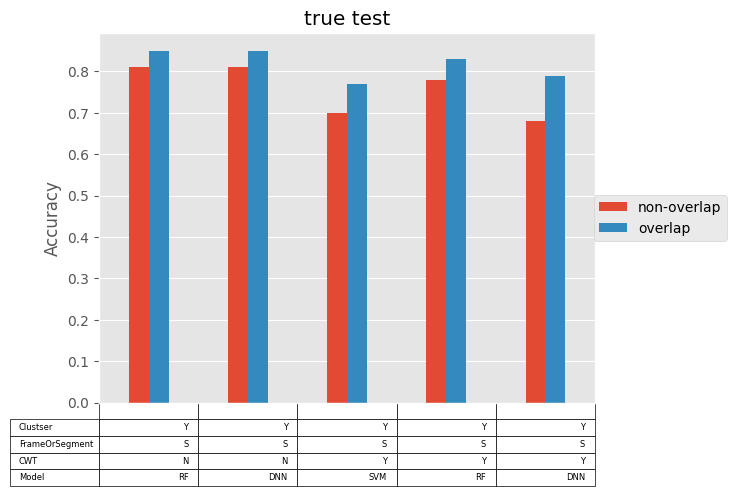

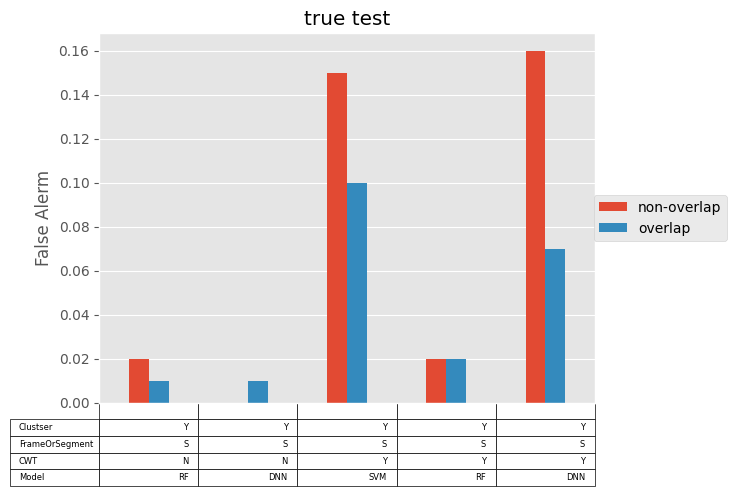

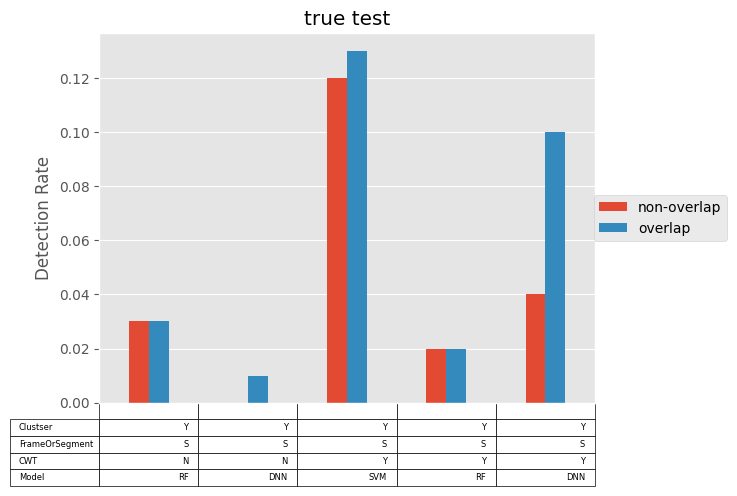

In [5]:
# compare
compare = 3 # 0 cluster, 2 cwt, 3 window
i = 2  # tr te tt
sel = [4,5,9,10,11]
# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['train','test','true test']
# select exp
compares = [
    ['N','Y'],
    ['frame','bs'],
    ['bs','cwt'],
    ['F','H'],
    ['svm', 'rf', 'dnn', 'lstm']
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
legends = [
    ['No cluster', 'Add cluster'],
    ['Frame', 'Segment'],
    ['No CWT', 'Add CWT'],
    ['non-overlap', 'overlap'],
    ['SVM', 'Random Forest', 'DNN', 'LSTM']
]
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap',
    'Model'
]
cmp = compares[compare]

#s = 1  # acc fa dr
for s in range(3):
    dt = cols[i]
    y = []
    names = []#
    for j, cmp in enumerate(compares[compare]):
        tmp = []
        tmp2 = []#
        for k in range(len(df3.index)):
            if df3.iloc[k]['model'].find(cmp)!=-1:
                tmp.append(df3.iloc[k][dt[s]])
                tmp2.append(df3.iloc[k]['model'])#
        y.append(tmp)
        names.append(tmp2)#
        #print(tmp2)
    cl = len(y)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    cell = [[],[],[],[],[]]
    cmps = []
    x=names[0]
    for k in range(len(x)):
        c = ntocell(x[k])
        for j in range(5):
            cell[j].append(c[j])
    del cell[compare]

    row_labels = cmp_titles.copy()
    del row_labels[compare]

    y = np.array(y)
    cell = np.array(cell)
    if sel:
        y = y[:,sel]
        cell = cell[:,sel]

    ax.title.set_text(subtitles[i])
    width = 0.1*cl
    x = np.arange(len(y[0]))
    spare_width = (1 - width)/cl

    for r in range(cl):
        ax.bar(x+r*width, y[r], width, label=legends[compare][r])
    ax.set_xlim(-spare_width,len(x)-spare_width)
    plt.xticks([])
    plt.ylabel(axes[s])
    plt.legend(loc='center right', bbox_to_anchor=(1.28, 0.5))

    # plot table
    table = plt.table(cellText=cell,
            rowLabels=row_labels,
            colLabels=['']*len(y[0]),
            loc='bottom')

    table.auto_set_font_size(False)
    table.set_fontsize(6)

### select to plot (cluster,cwt,window)

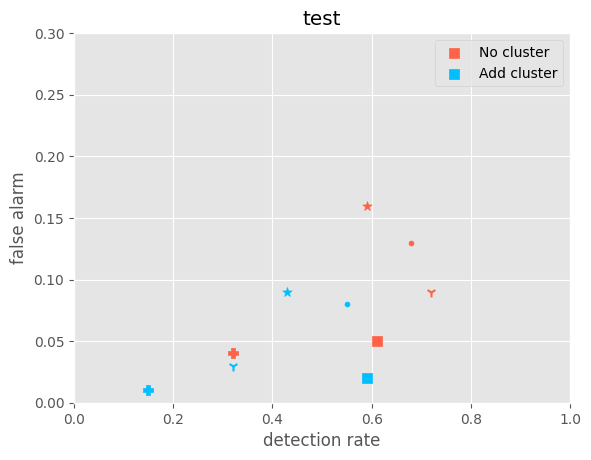

In [19]:
# compare
compare = 0 # 0 cluster, 2 cwt, 3 window
sel = [0,3,4,13,17]
i = 1  # tr te tt

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['train','test','true test']
# select exp
compares = [
    ['N','Y'],
    ['frame','bs'],
    ['bs','cwt'],
    ['F','H'],
    ['svm', 'rf', 'dnn', 'lstm']
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
legends = [
    ['No cluster', 'Add cluster'],
    ['Frame', 'Segment'],
    ['No CWT', 'Add CWT'],
    ['non-overlap', 'overlap'],
    ['SVM', 'Random Forest', 'DNN', 'LSTM']
]
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap',
    'Model'
]
cmp = compares[compare]
title = 'SC_'+cmp_titles[compare]+'_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)


dt = cols[i]
x = [] #dr
y = [] #fa
names = []#
for j, cmp in enumerate(compares[compare]):
    tmp0 = []
    tmp1 = []
    tmp2 = []
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            tmp0.append(df3.iloc[k][dt[1]])
            tmp1.append(df3.iloc[k][dt[2]])
            tmp2.append(df3.iloc[k]['model'])#
    y.append(tmp0)
    x.append(tmp1)
    names.append(tmp2)#
    #print(tmp2)
cl = len(y)
fig = plt.figure()
ax = fig.add_subplot(111)

y = np.array(y)
x = np.array(x)
if sel:
    y = y[:,sel]
    x = x[:,sel]

colors = ['tomato','deepskyblue']
markers = ['.','*','P','1','s']
for cc in range(2):
    for ss in range(5):
        if ss==4:
            plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50, label=legends[compare][cc])
        else:
            plt.scatter(x[cc][ss],y[cc][ss], color=colors[cc], marker=markers[ss], s=50)
plt.title(subtitles[i])
plt.xlim(0,1)
plt.xlabel('detection rate')
plt.ylim(0,0.3)
plt.ylabel('false alarm')
plt.legend()


## Show (FOS)

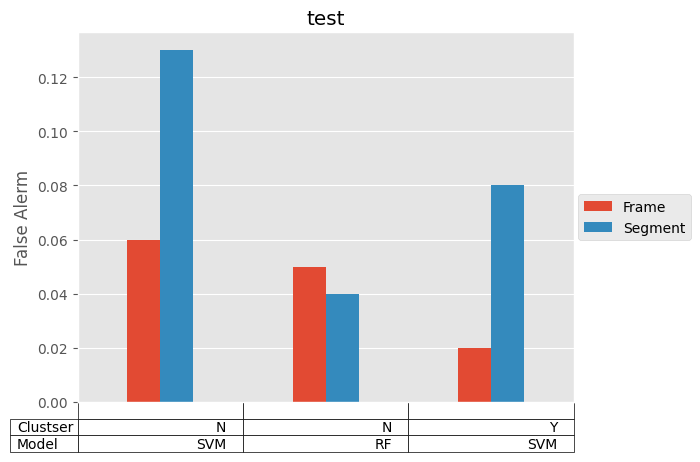

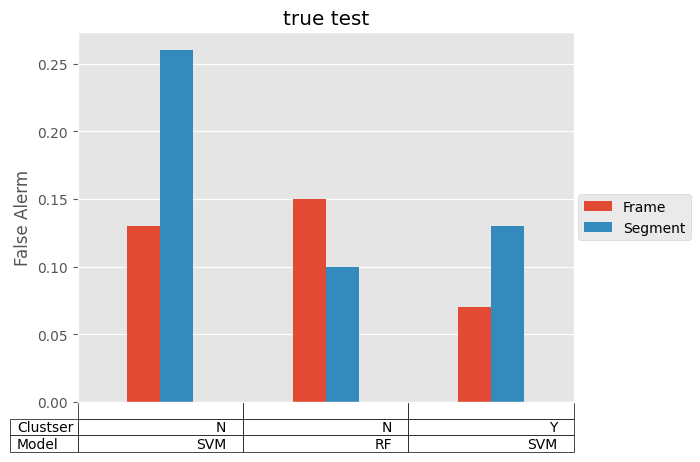

In [29]:
s = 1 # tr te tt
sel = [0,1,3]

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['train','test','true test']
# select exp
compares = ['frame','bsF']
compares2 = [
    ['N','Y'],
    ['svm', 'rf', 'dnn', 'lstm']
]
legends = ['Frame', 'Segment']
cmp_titles = [
    'Clustser',
    'Model'
]
show_cmps = [
    ['N','Y'],
    ['SVM', 'RF', 'DNN', 'LSTM']
]
title = 'BAR_FrameOrSeg_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

nidx = [[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)


for i in range(1,3):
    dt = cols[i]
    y = np.array([df3.iloc[nidx[0]][dt[s]], df3.iloc[nidx[1]][dt[s]]])

    cl = len(y)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    cell = [[],[]]
    cmps = []
    x=df3.iloc[nidx[0]]['model'].to_list()
    for k in range(len(x)):
        for r in range(2):
            for j, cmp in enumerate(compares2[r]):
                if x[k].find(cmp)!=-1:
                    cell[r].append(show_cmps[r][j])
                    break
                if j==len(compares2[r])-1:
                    cell[r].append('-')
    row_labels = cmp_titles.copy()
    
    # sort by max val
    y = np.array(y)
    cell = np.array(cell)
    # idx = sorted(np.arange(len(y[0])), key = lambda s:(y[1]-y[0])[s])
    # y = y[:,idx]
    # cell = cell[:,idx]
    if sel:
        y = y[:,sel]
        cell = cell[:,sel]

    ax.title.set_text(subtitles[i])
    width = 0.1*cl
    x = np.arange(len(y[0]))
    spare_width = (1 - width)/cl

    for r in range(cl):
        ax.bar(x+r*width, y[r], width, label=legends[r])
    ax.set_xlim(-spare_width,len(x)-spare_width)
    plt.xticks([])
    plt.ylabel(axes[s])
    plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    
    # plot table
    plt.table(cellText=cell,
            rowLabels=row_labels,
            colLabels=['']*len(y[0]),
            loc='bottom')
    
    # plt.savefig(save_path+axes[s]+'_'+str(i+1)+'.png', bbox_inches="tight")

## Show models

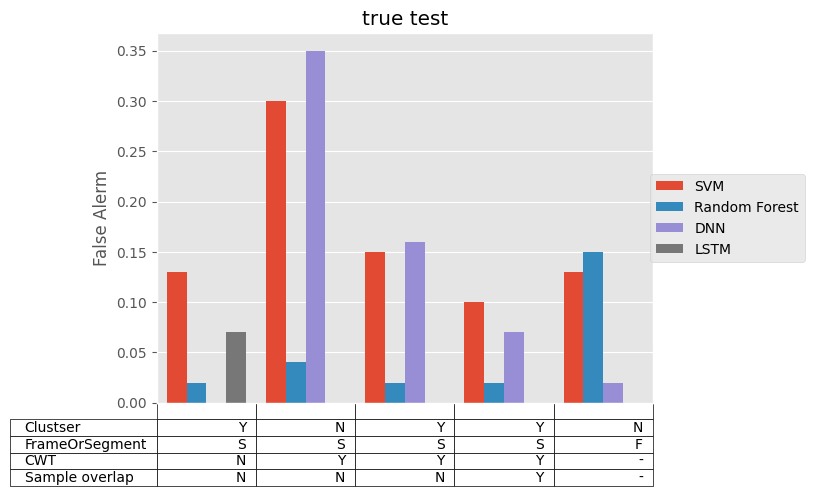

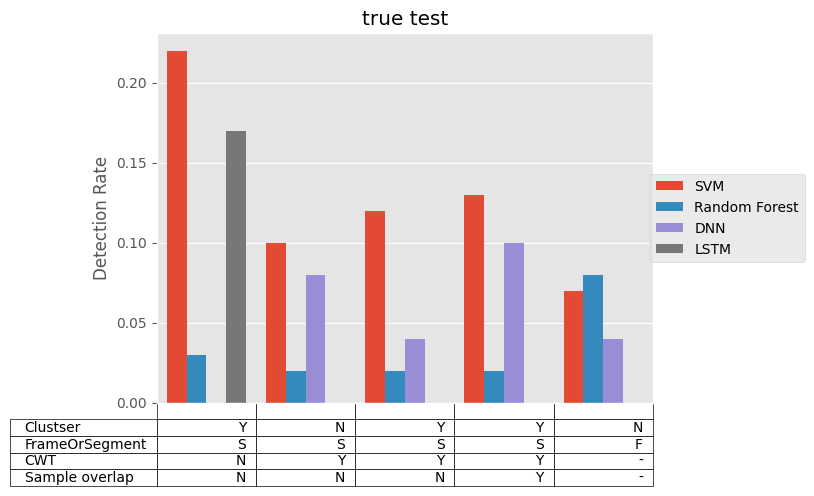

In [35]:
i = 2 # tr te tt
sel = [1,4,5,7,8]

# axes
axes = ['Accuracy', 'False Alerm', 'Detection Rate']
axess = ['ACC','FA','DR']
# subplots
cols = [['tracc','trfa','trdr'],['teacc','tefa','tedr'],['tteacc','ttefa','ttedr']]
subtitles = ['train','test','true test']
# select exp
compares = ['svm','rf','dnn','lstm']
legends = ['SVM', 'Random Forest', 'DNN', 'LSTM']
cmp_titles = [
    'Clustser',
    'FrameOrSegment',
    'CWT',
    'Sample overlap'
]
show_cmps = [
    ['N','Y'],
    ['F','S'],
    ['N','Y'],
    ['N','Y']
]
title = 'BAR_Model_Compare'
save_path = save_root+title+'/'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

nidx = [[],[],[],[]] # [frame idx, segment idx]
for j, cmp in enumerate(compares):
    for k in range(len(df3.index)):
        if df3.iloc[k]['model'].find(cmp)!=-1:
            nidx[j].append(k)



for s in range(1,3):
    dt = cols[i]
    y = []
    for j in range(4):
        y.append(df3.iloc[nidx[j]][dt[s]].tolist())
    y[3].extend([0,0])
    y = np.array(y)

    cl = len(y)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    cell = [[],[],[],[],[]]
    cmps = []
    x=df3.iloc[nidx[0]]['model'].to_list()
    for k in range(len(x)):
        c = ntocell(x[k])
        for j in range(5):
            cell[j].append(c[j])
    del cell[4]

    row_labels = cmp_titles.copy()

    # sort by max val
    y = np.array(y)
    cell = np.array(cell)
    # idx = sorted(np.arange(len(y[0])), key = lambda s:(np.max(y,axis=0)-np.min(y,axis=0))[s])
    # y = y[:,idx]
    # cell = cell[:,idx]
    if sel:
        y = y[:,sel]
        cell = cell[:,sel]

    ax.title.set_text(subtitles[i])
    width = 0.2
    x = np.arange(len(y[0]))
    spare_width = (1 - width)/cl

    for r in range(cl):
        ax.bar(x+r*width, y[r], width, label=legends[r])
    ax.set_xlim(-spare_width,len(x)-spare_width)
    plt.xticks([])
    plt.ylabel(axes[s])
    plt.legend(loc='center right', bbox_to_anchor=(1.32, 0.5))

    # plot table
    plt.table(cellText=cell,
            rowLabels=row_labels,
            colLabels=['']*len(y[0]),
            loc='bottom')
            
    # plt.savefig(save_path+axes[s]+'_'+str(i+1)+'.png', bbox_inches="tight")